In [2]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit

In [3]:
fulldata=pd.read_csv('defaultloan.csv',index_col=0)

In [4]:
fulldata.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


# Cleaning Data

In [5]:
# Removing the extra header like X1,X2,X3...

def fix_header(data):
    new_header=data.iloc[0]
    data=data[1:]
    data.columns=new_header
    data.rename(columns={'default payment next month':'DEFAULTER'},inplace=True)
    return data
fulldata=fix_header(fulldata)

In [6]:

fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
#Checking null values in the dataframe

fulldata.isnull().values.any()

False

In [8]:
#checking the range of values in Education and making it meaningful

fulldata.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [9]:
fulldata.EDUCATION[fulldata.EDUCATION=='0']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='5']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='6']='4'

fulldata.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [10]:
fulldata.EDUCATION.unique()

array(['2', '1', '3', '4'], dtype=object)

In [11]:
#checking the range of values in Marriage and making it meaningful
fulldata['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
fulldata.MARRIAGE[fulldata.MARRIAGE=='0']='3'
fulldata.MARRIAGE.unique()
fulldata.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

In [14]:
fulldata[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

ID,SEX,EDUCATION,MARRIAGE
count,30000,30000,30000
unique,2,4,3
top,2,2,2
freq,18112,14030,15964


In [ ]:
#renaming the header for Pay_0 to Pay_1

In [15]:
def fix_header(data):
    data.rename(columns={'PAY_0':'PAY_1'},inplace=True)
    return data
fulldata=fix_header(fulldata)

In [16]:
fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

fulldata=fulldata.astype(float)

In [18]:
#making the values in PAY_number meaningful by removing the negative values in it

fil = (fulldata.PAY_1 ==-2) | (fulldata.PAY_1 ==-1) | (fulldata.PAY_1 ==0)
fulldata.loc[fil, 'PAY_1'] =0

fil = (fulldata.PAY_2 ==-2) | (fulldata.PAY_2 ==-1) | (fulldata.PAY_2 ==0)
fulldata.loc[fil, 'PAY_2'] =0

fil = (fulldata.PAY_3 ==-2) | (fulldata.PAY_3 == -1) | (fulldata.PAY_3 ==0)
fulldata.loc[fil, 'PAY_3'] =0


fil = (fulldata.PAY_4 ==-2) | (fulldata.PAY_4 ==-1) | (fulldata.PAY_4 ==0)
fulldata.loc[fil, 'PAY_4'] =0


fil = (fulldata.PAY_5 ==-2) | (fulldata.PAY_5 == -1) | (fulldata.PAY_5 ==0)
fulldata.loc[fil, 'PAY_5'] =0


fil = (fulldata.PAY_6 ==-2) | (fulldata.PAY_6== -1) | (fulldata.PAY_6 ==0)
fulldata.loc[fil, 'PAY_6'] =0




In [ ]:
#Histogram visualization of PAY column

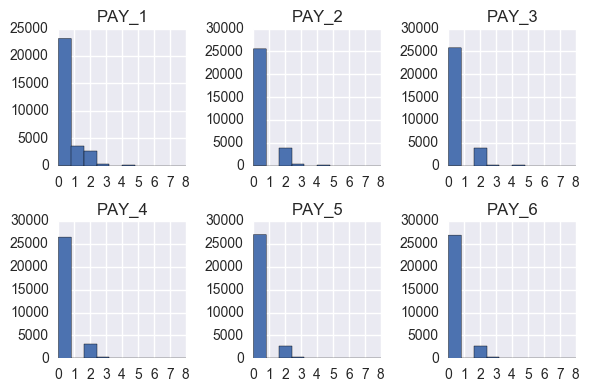

In [19]:
late = fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [ ]:
# Finding outstanding amount trends

In [20]:
fulldata['out_bal_apr'] = ((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5'])))

fulldata['out_bal_may'] = (fulldata['out_bal_apr'] +(fulldata['BILL_AMT4'] - (fulldata['BILL_AMT5'] - fulldata['PAY_AMT4'])))

fulldata['out_bal_june'] = fulldata['out_bal_may']+(fulldata['BILL_AMT3'] - (fulldata['BILL_AMT4'] - fulldata['PAY_AMT3']))

fulldata['out_bal_july'] =fulldata['out_bal_june']+ (fulldata['BILL_AMT2'] - (fulldata['BILL_AMT3'] - fulldata['PAY_AMT2']))
fulldata['out_bal_aug'] =fulldata['out_bal_july']+ (fulldata['BILL_AMT1'] - (fulldata['BILL_AMT2'] - fulldata['PAY_AMT1']))


In [21]:
outstanding_apr=fulldata['out_bal_apr'].sum()
outstanding_may=fulldata['out_bal_may'].sum()
outstanding_june=fulldata['out_bal_june'].sum()
outstanding_july=fulldata['out_bal_july'].sum()
outstanding_aug=fulldata['out_bal_aug'].sum()


In [22]:
print outstanding_apr
print outstanding_june
print outstanding_aug

187170846.0
689776212.0
1163623815.0


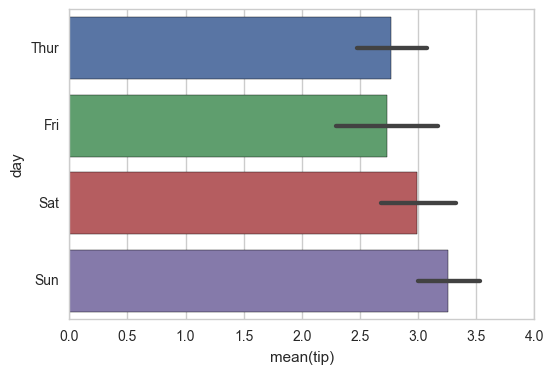

In [168]:
import seaborn as sns
ax = sns.barplot(x="tip", y="day", data=tips)

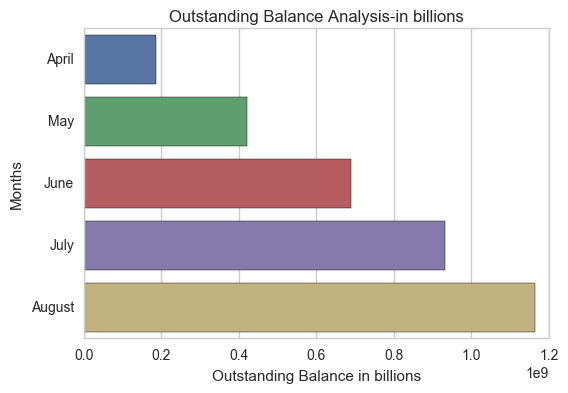

In [173]:
names  = ['April', 'May', 'June', 'July', 'August']
values = [outstanding_apr,outstanding_may,outstanding_june,outstanding_july,outstanding_aug]
plt.xlabel('Outstanding Balance in billions')
plt.ylabel('Months')
plt.title('Outstanding Balance Analysis-in billions')
sns.set_style("whitegrid")

ax = sns.barplot(x = values, y = names)
ax.set_yticklabels(['April', 'May', 'June', 'July', 'August'])

In [ ]:
#Number of customers with outstanding amount 

In [24]:
fulldata['out_bucket']='0'
fulldata.out_bucket.value_counts()

0    30000
Name: out_bucket, dtype: int64

In [145]:
fulldata.loc[fulldata['out_bal_aug']<=0, 'out_bucket']=1
fulldata.loc[((fulldata['out_bal_aug']>0)&(fulldata['out_bal_aug']<1000)),'out_bucket']=2
fulldata.loc[((fulldata['out_bal_aug']>=1000)&(fulldata['out_bal_aug']<5000)),'out_bucket']=3
fulldata.loc[((fulldata['out_bal_aug']>=5000)&(fulldata['out_bal_aug']<10000)),'out_bucket']=4
fulldata.loc[((fulldata['out_bal_aug']>=10000)&(fulldata['out_bal_aug']<25000)),'out_bucket']=5
fulldata.loc[((fulldata['out_bal_aug']>=25000)&(fulldata['out_bal_aug']<50000)),'out_bucket']=6
fulldata.loc[((fulldata['out_bal_aug']>=50000)&(fulldata['out_bal_aug']<100000)),'out_bucket']=7
fulldata.loc[(fulldata['out_bal_aug']>=100000),'out_bucket']=8
fulldata.out_bucket.value_counts()

5    6126
6    5718
3    5642
7    4187
4    3652
8    2800
1    1210
2     665
Name: out_bucket, dtype: int64

In [156]:

import pandas as pd
out_names= fulldata['out_bucket'].value_counts(sort=False,ascending=False).keys().tolist()

out_counts = fulldata['out_bucket'].value_counts(sort=False, ascending=False).tolist()
print out_names[0]

print out_counts[1]

1
665


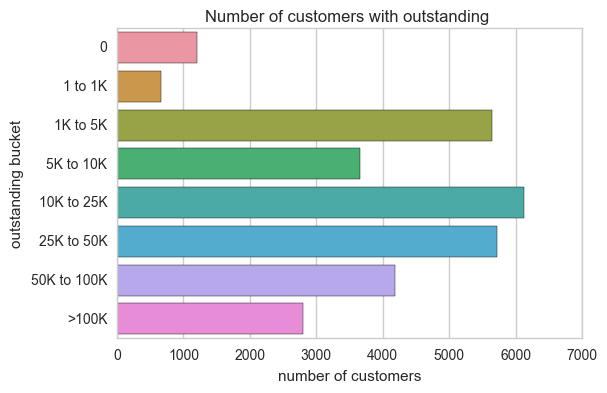

In [172]:
out_names_alias=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
out_counts_alias=[out_counts[0],out_counts[1],out_counts[2],out_counts[3],out_counts[4],out_counts[5],out_counts[6],out_counts[7]]
plt.xlabel('number of customers')
plt.ylabel('outstanding bucket')
plt.title('Number of customers with outstanding ')
ax = sns.barplot(x = out_counts_alias, y = out_names_alias)
ax.set_yticklabels(['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K'])

In [ ]:
#Age of outstanding amount analysis

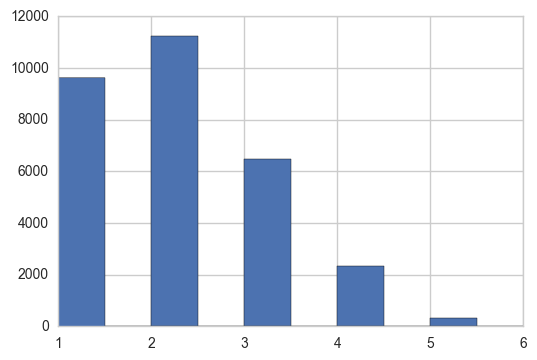

In [115]:
fulldata['AgeBin'] =0 #creates a column of 0
fulldata.loc[((fulldata['AGE'] > 20) & (fulldata['AGE'] < 30)) , 'AgeBin'] = 1
fulldata.loc[((fulldata['AGE'] >= 30) & (fulldata['AGE'] < 40)) , 'AgeBin'] = 2
fulldata.loc[((fulldata['AGE'] >= 40) & (fulldata['AGE'] < 50)) , 'AgeBin'] = 3
fulldata.loc[((fulldata['AGE'] >= 50) & (fulldata['AGE'] < 60)) , 'AgeBin'] = 4
fulldata.loc[((fulldata['AGE'] >= 60) & (fulldata['AGE'] < 70)) , 'AgeBin'] = 5
fulldata.loc[((fulldata['AGE'] >= 70) & (fulldata['AGE'] < 81)) , 'AgeBin'] = 6
fulldata.AgeBin.hist()

In [178]:

out_names_age= fulldata['AgeBin'].value_counts(sort=False,ascending=False).keys().tolist()

out_counts_age = fulldata['AgeBin'].value_counts(sort=False, ascending=False).tolist()
print out_names_age[0]

print out_counts_age[0]

1
9618


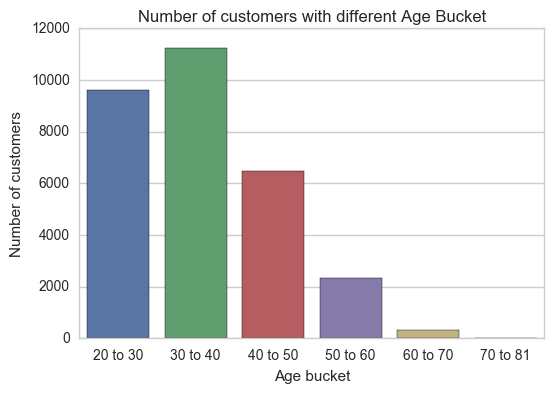

In [183]:
out_names_age_alias=['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81']
out_counts_age_alias=[out_counts_age[0],out_counts_age[1],out_counts_age[2],out_counts_age[3],out_counts_age[4],out_counts_age[5]]
plt.xlabel('Age bucket')
plt.ylabel('Number of customers')
plt.title('Number of customers with different Age Bucket')
ax = sns.barplot(x = out_names_age_alias, y = out_counts_age_alias)
ax.set_xticklabels(['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81'])

In [28]:
def corr_2_cols(Col1, Col2):
    res = fulldata.groupby([Col1, Col2]).size().unstack()
    #res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [29]:

corr_2_cols('out_bucket','AgeBin')


AgeBin,1,2,3,4,5,6
out_bucket,,,,,,
1,325.0,485.0,276.0,93.0,28.0,3.0
2,223.0,274.0,125.0,37.0,6.0,NaN
3,1934.0,1886.0,1231.0,525.0,63.0,3.0
4,1288.0,1308.0,734.0,284.0,37.0,1.0
5,2134.0,2288.0,1232.0,413.0,54.0,5.0
6,1900.0,2110.0,1205.0,440.0,59.0,4.0
7,1208.0,1691.0,927.0,317.0,37.0,7.0
8,606.0,1196.0,734.0,232.0,30.0,2.0


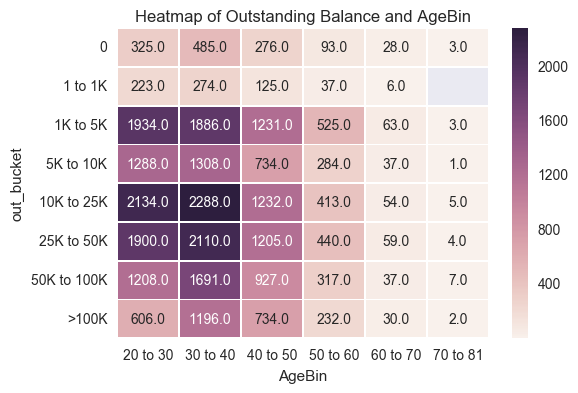

In [30]:
lab=['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'AgeBin')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2,linewidths=.5)
r.set_title("Heatmap of Outstanding Balance and AgeBin")

In [ ]:
# Based on our analysis,more clients between age group of 30 to 40 and 20 to 30 have an outstanding balance of range 10 K to 50K

In [ ]:
#finding relationship between in outstanding amount / trend with respect to age,education, marriage, credit limit

In [31]:
corr_2_cols('out_bucket','EDUCATION')

EDUCATION,1.0,2.0,3.0,4.0
out_bucket,,,,
1,571,441,183,15
2,263,307,88,7
3,1793,2745,1063,41
4,1219,1730,656,47
5,2183,2896,961,86
6,1858,2806,959,95
7,1534,1933,643,77
8,1164,1172,364,100


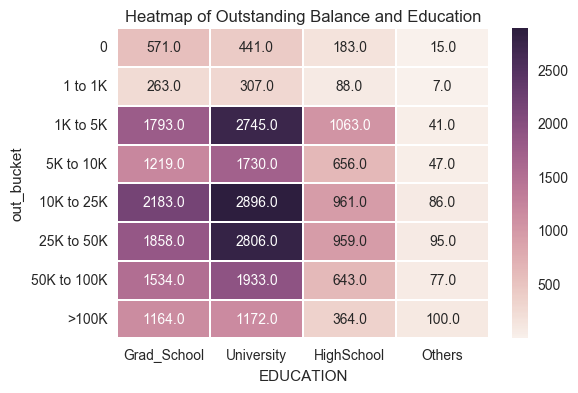

In [32]:
lab=['Grad_School','University','HighSchool','Others']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'EDUCATION')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and Education")

In [ ]:
#Client having an university degree has more number of outstanding balance. 

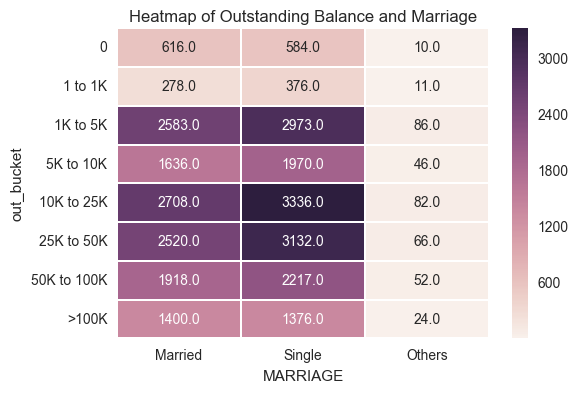

In [33]:
lab=['Married','Single','Others']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'MARRIAGE')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and Marriage")

In [ ]:
#Client whose is single tends to have more number of outstanding balance

In [34]:
df=pd.DataFrame(fulldata,columns=['out_bal_aug','AGE','EDUCATION','MARRIAGE','LIMIT_BAL'])
df.head()

,out_bal_aug,AGE,EDUCATION,MARRIAGE,LIMIT_BAL
1,4602.0,24.0,2.0,1.0,20000.0
2,2421.0,26.0,2.0,2.0,120000.0
3,19708.0,34.0,2.0,2.0,90000.0
4,24831.0,37.0,2.0,1.0,50000.0
5,47856.0,57.0,2.0,1.0,50000.0


In [36]:
fulldata['gender_marital']=0
fulldata.loc[((fulldata.SEX == 1) & (fulldata.MARRIAGE == 1)) , 'gender_marital'] = 1 #married man
fulldata.loc[((fulldata.SEX == 1) & (fulldata.MARRIAGE == 2)) , 'gender_marital'] = 2 #single man
fulldata.loc[((fulldata.SEX == 1) & (fulldata.MARRIAGE == 3)) , 'gender_marital'] = 3 #divorced man
fulldata.loc[((fulldata.SEX == 2) & (fulldata.MARRIAGE == 1)) , 'gender_marital'] = 4 #married women
fulldata.loc[((fulldata.SEX == 2) & (fulldata.MARRIAGE == 2)) , 'gender_marital'] = 5 #single women
fulldata.loc[((fulldata.SEX == 2) & (fulldata.MARRIAGE == 3)) , 'gender_marital'] = 6 #divorced women

In [37]:
corr_2_cols('out_bucket','gender_marital')

gender_marital,1,2,3,4,5,6
out_bucket,,,,,,
1,225,237,3,391,347,7
2,86,128,4,192,248,7
3,1025,1302,34,1558,1671,52
4,600,787,16,1036,1183,30
5,955,1280,34,1753,2056,48
6,954,1278,27,1566,1854,39
7,725,920,21,1193,1297,31
8,620,621,6,780,755,18


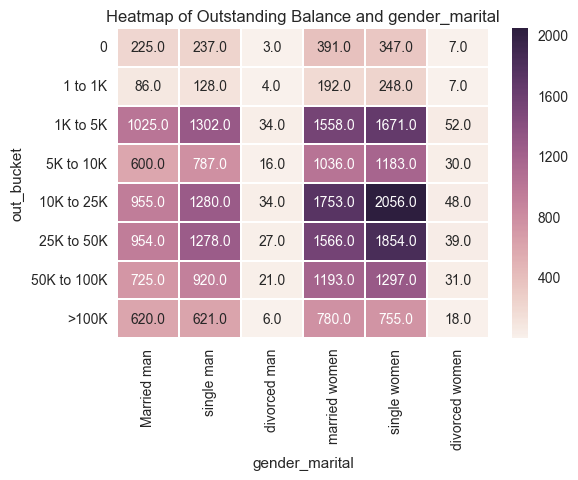

In [38]:
lab=['Married man','single man','divorced man','married women','single women','divorced women']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'gender_marital')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and gender_marital")

In [ ]:
#Clients who are single women has more number of outstanding balance

In [39]:
fulldata['gender_agebin'] = 0
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 1)) , 'gender_agebin'] = 1 #man in 20's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 2)) , 'gender_agebin'] = 2 #man in 30's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 3)) , 'gender_agebin'] = 3 #man in 40's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 4)) , 'gender_agebin'] = 4 #man in 50's
fulldata.loc[((fulldata.SEX == 1) & (fulldata.AgeBin == 5)) , 'gender_agebin'] = 5 #man in 60's and above
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 1)) , 'gender_agebin'] = 6 #woman in 20's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 2)) , 'gender_agebin'] = 7 #woman in 30's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 3)) , 'gender_agebin'] = 8 #woman in 40's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 4)) , 'gender_agebin'] = 9 #woman in 50's
fulldata.loc[((fulldata.SEX == 2) & (fulldata.AgeBin == 5)) , 'gender_agebin'] = 10 #woman in 60's and above
corr_2_cols('out_bucket', 'gender_agebin')

gender_agebin,0,1,2,3,4,5,6,7,8,9,10
out_bucket,,,,,,,,,,,
1,3.0,134.0,174.0,99.0,44.0,12.0,191.0,311.0,177.0,49.0,16.0
2,NaN,69.0,91.0,49.0,9.0,NaN,154.0,183.0,76.0,28.0,6.0
3,3.0,747.0,802.0,529.0,243.0,38.0,1187.0,1084.0,702.0,282.0,25.0
4,1.0,420.0,530.0,317.0,120.0,15.0,868.0,778.0,417.0,164.0,22.0
5,5.0,664.0,874.0,515.0,189.0,25.0,1470.0,1414.0,717.0,224.0,29.0
6,4.0,622.0,874.0,512.0,219.0,31.0,1278.0,1236.0,693.0,221.0,28.0
7,7.0,406.0,660.0,417.0,157.0,21.0,802.0,1031.0,510.0,160.0,16.0
8,2.0,219.0,560.0,333.0,111.0,24.0,387.0,636.0,401.0,121.0,6.0


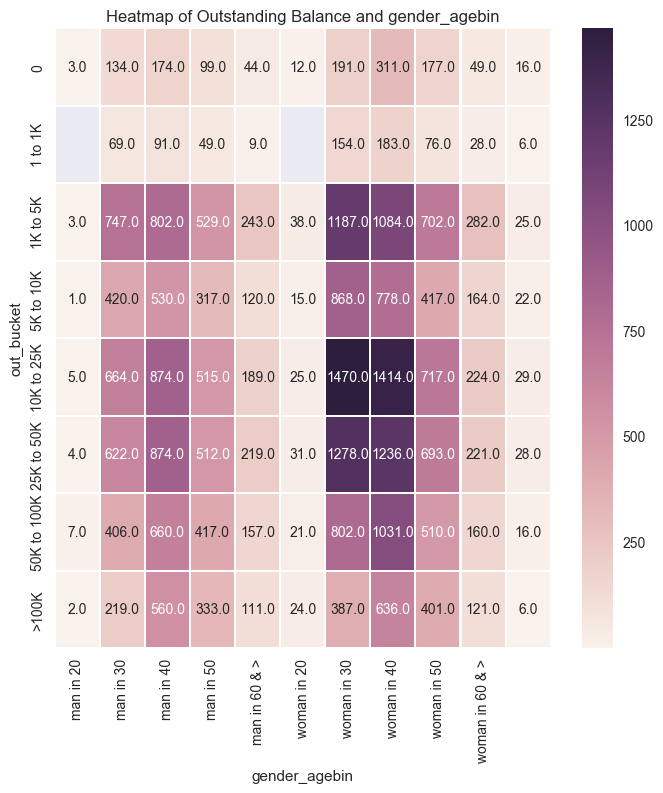

In [40]:
f,ax = plt.subplots(figsize=(8, 8))

lab=['man in 20','man in 30','man in 40','man in 50','man in 60 & >','woman in 20','woman in 30','woman in 40','woman in 50','woman in 60 & >']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'gender_agebin')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8,ax=ax)
r.set_title("Heatmap of Outstanding Balance and gender_agebin")

In [ ]:
#Woman Clients with the age group of 30 to 40 tends to have an more number of outstanding balance of range 10K to 25K

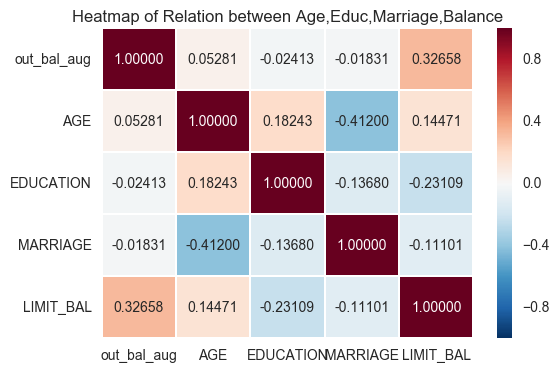

In [84]:
cor = df.corr()
r=sns.heatmap(cor,annot=True,fmt="0.5f",xticklabels=cor.columns.values,yticklabels=cor.columns.values, linewidths=.8)
r.set_title("Heatmap of Relation between Age,Educ,Marriage,Balance")

In [ ]:
#The correlation between outstanding balance and Limit Balance is highly co-related(0.32658) to other columns

In [41]:
#finding the closeness of the use of credit card by the customers

fulldata['Closeness_6'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT6) / fulldata.LIMIT_BAL
fulldata['Closeness_5'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT5) / fulldata.LIMIT_BAL
fulldata['Closeness_4'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT4) / fulldata.LIMIT_BAL
fulldata['Closeness_3'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT3) / fulldata.LIMIT_BAL
fulldata['Closeness_2'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT2) / fulldata.LIMIT_BAL
fulldata['Closeness_1'] = (fulldata.LIMIT_BAL - fulldata.BILL_AMT1) / fulldata.LIMIT_BAL
fulldata[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'DEFAULTER']].sample(20)

ID,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,DEFAULTER
28387,0.963150,0.907000,0.973850,0.604667,0.496400,0.521033,1.0
4975,0.577900,0.585867,0.594993,0.600367,0.608293,0.620293,0.0
10741,0.990200,0.993994,1.000028,0.998361,1.000008,1.000008,1.0
5780,0.138433,0.157733,0.177800,0.194383,0.211333,0.232267,0.0
29241,0.991345,0.998636,1.001364,0.998400,0.997036,0.997036,1.0
27538,0.080500,0.099850,0.117500,0.070600,0.008000,0.057200,0.0
17797,1.000000,0.981076,0.972343,0.944024,0.968833,0.992886,0.0
604,0.786214,0.782471,0.794714,0.798779,0.794121,0.811071,0.0
10231,0.091543,-0.008186,0.008779,0.059493,0.033507,0.058021,0.0
13477,0.777708,0.813044,0.830424,0.921964,0.918532,0.886776,0.0


In [42]:
fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,out_bucket,out_bucket2,AgeBin,gender_marital,gender_agebin,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,0.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,689.0,3791.0,4602.0,3,3,1,4,6,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350
2,120000.0,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,194.0,1011.0,1421.0,1464.0,2421.0,3,3,1,5,6,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,399.0,782.0,1010.0,2978.0,19708.0,5,5,2,5,7,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,481.0,936.0,23113.0,24074.0,24831.0,5,5,2,4,7,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200
5,50000.0,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,704.0,11498.0,36393.0,42909.0,47856.0,6,6,4,1,4,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660


# Building Model to find defaulters

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'gender_marital', 'AgeBin', 'gender_agebin', 'out_bal_apr', 'out_bal_may',
            'out_bal_june', 'out_bal_july', 'out_bal_aug', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1']
y = fulldata['DEFAULTER'].copy() # target
X = fulldata[features].copy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape


(24000, 34)
(6000, 34)
(24000L,)
(6000L,)


In [45]:
df_train=x_train.join(y_train)
df_train.head()

ID,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,gender_marital,AgeBin,gender_agebin,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,DEFAULTER
21754,80000.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,75125.0,77353.0,78321.0,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0,5,1,6,1631.0,36937.0,43619.0,47652.0,48927.0,0.504463,0.078363,0.020987,0.033087,0.060937,0.0
252,30000.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,29242.0,29507.0,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0,2,1,1,22001.0,26210.0,30961.0,32557.0,37298.0,0.266633,0.158167,0.028167,0.016433,0.025267,0.0
22942,180000.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20916.0,0.0,850.0,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0,4,3,8,6881.0,6881.0,7731.0,7731.0,28647.0,0.961772,1.000000,0.995278,1.000000,0.883800,0.0
619,60000.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,58839.0,53235.0,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0,2,1,1,2379.0,3899.0,4793.0,21395.0,29017.0,0.339683,0.339350,0.357783,0.112750,0.019350,0.0
17091,130000.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,111587.0,112348.0,114734.0,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0,5,1,6,1950.0,3919.0,5830.0,7644.0,10983.0,0.070354,0.093669,0.117431,0.135785,0.141638,0.0


In [46]:
df_test=x_test.join(y_test)
df_test.head()

ID,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,gender_marital,AgeBin,gender_agebin,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,DEFAULTER
2309,30000.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8864.0,10062.0,11581.0,12580.0,13716.0,14828.0,1500.0,2000.0,1500.0,1500.0,1500.0,2000.0,2,1,1,388.0,752.0,1253.0,1734.0,2036.0,0.542800,0.580667,0.613967,0.664600,0.704533,0.0
22405,150000.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,136736.0,125651.0,116684.0,101581.0,77741.0,77264.0,4486.0,4235.0,3161.0,2647.0,2669.0,2669.0,5,1,6,3146.0,29633.0,47897.0,61099.0,76670.0,0.481727,0.322793,0.222107,0.162327,0.088427,0.0
23398,70000.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,70122.0,69080.0,68530.0,69753.0,70111.0,70212.0,2431.0,3112.0,3000.0,2438.0,2500.0,2554.0,4,2,7,2399.0,4479.0,6256.0,9918.0,13391.0,-0.001586,0.003529,0.021000,0.013143,-0.001743,0.0
25059,130000.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20678.0,18956.0,16172.0,16898.0,11236.0,6944.0,1610.0,1808.0,7014.0,27.0,7011.0,4408.0,2,3,3,11303.0,16992.0,23280.0,27872.0,31204.0,0.913569,0.870015,0.875600,0.854185,0.840938,0.0
2665,50000.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,94228.0,47635.0,42361.0,19574.0,20295.0,19439.0,2000.0,1500.0,1000.0,1800.0,0.0,1000.0,5,2,7,856.0,1935.0,25722.0,32496.0,81089.0,0.594100,0.608520,0.152780,0.047300,-0.884560,1.0


In [47]:
df_majority = df_train[df_train.DEFAULTER==0]
df_minority = df_train[df_train.DEFAULTER==1]

print(df_majority.DEFAULTER.count())
print("-----------")
print(df_minority.DEFAULTER.count())
print("-----------")
print(df_train.DEFAULTER.value_counts())

18677
-----------
5323
-----------
0.0    18677
1.0     5323
Name: DEFAULTER, dtype: int64


In [48]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18677,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.DEFAULTER.value_counts()

1.0    18677
0.0    18677
Name: DEFAULTER, dtype: int64

In [49]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5323,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.DEFAULTER.value_counts()

1.0    5323
0.0    5323
Name: DEFAULTER, dtype: int64

In [85]:
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm
from sklearn.cross_validation import cross_val_score, train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn import preprocessing,cross_validation,svm,neighbors
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from subprocess import check_output

In [77]:
x = df_train.drop(['DEFAULTER'],axis = 1)
y = df_train.DEFAULTER

# rescale the metrics to the same mean and standard deviation
scaler = preprocessing.StandardScaler()
x = scaler.fit(x).transform(x)

# Further divide the train data into train test split 70% & 30% respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=2)

In [78]:
from sklearn import tree

In [79]:
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
}


In [80]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,SVM,0.684729,0.348153,0.461602,0.819861
1,KNeighborsClassifier,0.558257,0.345022,0.426471,0.794167
2,RandomForest,0.615877,0.301190,0.404542,0.803333
3,GaussianNB,0.449060,0.568566,0.501796,0.749583
4,DecisionTreeClassifier,0.395092,0.403256,0.399132,0.730694
5,LogisticRegression,0.696765,0.323732,0.442069,0.818750
6,GradientBoosting,0.681971,0.381340,0.489157,0.823333


In [81]:
def gridsearch(model, params,x_train, x_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(x_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best AUC on Train set: ', gs.best_score_)
    print ('Best AUC on Test set: ', gs.score(x_test, y_test))

# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print (conf)

# Function to plot roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()
    
def model(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    prob = md.predict_proba(x_test)[:,1]
    print (' ') 
    print ('Accuracy on Train set: ', md.score(x_train, y_train))
    print ('Accuracy on Test set: ', md.score(x_test, y_test))
    print (' ')
    print(classification_report(y_test, pred))
    print (' ')
    print ('Confusion Matrix')
    confmat(pred, y_test)
    roc(prob, y_test)
    return md

In [82]:
# Use gridsearch to fine tune the parameters
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': [100,200,300],'learning_rate' : [0.01, 0.02, 0.05, 0.1]}
gridsearch(gb, gb_params,x_train, x_test, y_train, y_test,5)

('Best params: ', {'n_estimators': 200, 'learning_rate': 0.01})
('Best AUC on Train set: ', 0.82)
('Best AUC on Test set: ', 0.82472222222222225)


In [ ]:
#building ROC curve

 
('Accuracy on Train set: ', 0.87678571428571428)
('Accuracy on Test set: ', 0.82125000000000004)
 
             precision    recall  f1-score   support

        0.0       0.84      0.95      0.89      5603
        1.0       0.67      0.37      0.48      1597

avg / total       0.80      0.82      0.80      7200

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                      598                      999
Not Defaulter                  288                     5315


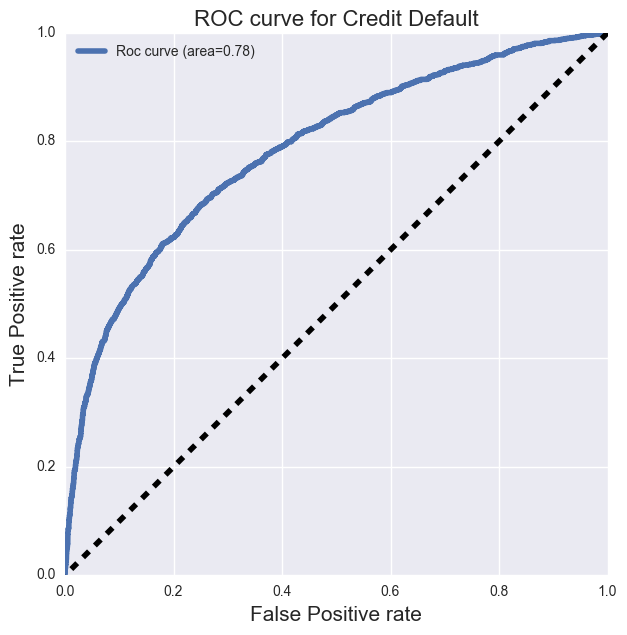

In [86]:
gb = GradientBoostingClassifier(learning_rate= 0.02, max_depth= 7,n_estimators=300, max_features = 0.9,min_samples_leaf = 5)
model_gb = model(gb, x_train, y_train,x_test, y_test)

In [87]:
Count_Row=df_test.shape[0] #gives number of row count
print Count_Row

6000


In [ ]:
#saving the prediction to test the model result in the test_data 

In [88]:
df_test['PREDICTED_STATUS']=np.int_(model_gb.predict(df_test.drop(['DEFAULTER'],axis = 1)))
df_test.index.names = ['ID']

In [89]:
df_test['PREDICTED_STATUS'].to_csv("credit_card_default_TRAIN_Predict.csv")